
## Analisi di dati da precipitazione

In [ ]:
install.packages('dplyr')
library('dplyr')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#media dei tempi, pesando interamente i dati interni all'ora, 1/2 quelli al limite
#analizzando tempi lunghi, non dovrebbe dare problemi
#fare media semplice dei valori compresi 

In [ ]:
dataPLV = read.table('MyGridPLV_EmiliaRomagna.txt', header = TRUE, colClasses = 'numeric')
dataGPM = read.table('MyGridGPM_EmiliaRomagna.txt', header = TRUE, colClasses = 'numeric')
dataERA5 = read.table('MyGridERA5_EmiliaRomagna.txt', header = TRUE, colClasses = 'numeric')
dataSAT = read.table('MyGridSAT_EmiliaRomagna.txt', header = TRUE, colClasses = 'numeric')

In [ ]:
#dataERA5 = dataERA5[,c(1,2, (24*13+2+1):(24*13+2+1+23))]
#dim(dataERA5)

#dataERA5 = dataERA5[c(1,2,which(substr(colnames(dataERA5),6,9) == '1014')[2:26])]

# TEST A CASO SU DATI ERA5: CHIEDERE A TUTOR PERCHE STO SMATTANDO
dataERA5 = dataERA5[,c(1,2,which(substr(colnames(dataERA5),6,9) == '1014')[2:25])]

In [ ]:
dataERA5 = dataERA5[,order(colnames(dataERA5))]

In [ ]:
 # SET A ZERO DEI VALORI NA / NEGATIVI

dataPLV[dataPLV < 0] = NA


#dataSAT[is.na(dataSAT)] = as.double(0)

# Non esiste il file relativo alle 14:12 di dataSAT, quindi ho settato
# il valore di questa colonna a 0 in modo da non incasinare
# la funzione per le medie. 
        
dataSAT$'X201610141412' = NA
dataSAT = dataSAT[,order(colnames(dataSAT))]
    
# ----------------------------

In [ ]:
cat('DATA \t DIM GRID \t DATI TEMPO  \n')
cat(paste('PLV:', '\t', dim(dataPLV)[1], '\t\t', dim(dataPLV)[2] - 2, '\n'))
cat(paste('GPM:', '\t', dim(dataGPM)[1], '\t\t', dim(dataGPM)[2] - 2, '\n'))
cat(paste('ERA5:', '\t', dim(dataERA5)[1], '\t\t', dim(dataERA5)[2] - 2, '\n'))
cat(paste('SAT:', '\t', dim(dataSAT)[1], '\t\t', dim(dataSAT)[2] - 2, '\n'))

DATA 	 DIM GRID 	 DATI TEMPO  
PLV: 	 286 		 24 
GPM: 	 286 		 48 
ERA5: 	 286 		 24 
SAT: 	 286 		 96 


In [ ]:
data_proc = function(data, nome='a') {
       
    if (nome == 'GPM') { 
        dataTemp = data.frame(lon = data$lon, lat = data$lat)
        for (i in seq(3,50,2))  {
            a = rowMeans(data[,i:(i+1)])
            dataTemp = cbind(dataTemp, a)}
        data = dataTemp
        }
        
        # FARE FUNZIONE MEDIA MEZZ'ORE}
    if (nome == 'SAT') { 
        
        dataTemp = data.frame(lon = data$lon, lat = data$lat)
        for (i in seq(3,95,4))  {
            a = c()
            for (j in 1:dim(data)[1]) {
                
                row = data[j,i:(i+3)]
                N = length(row[!is.na(row)])
                if (N == 0) {a = c(a, NA)}
                else {
                a = c(a, 
                        sum(row[!is.na(row)])/N*3600)}
                
            }
            
            
            #if (i == 59) {
            #    a = rowSums(data[,i:(i+3)])/3*3600
            #}
            #else {
            #a = rowMeans(data[,i:(i+3)])*3600
        
        dataTemp = cbind(dataTemp, a)}
        data = dataTemp
        } 
    
    #cat(dim(data)[2], '\n')
    colnames(data) = c('lon', 'lat', as.character(0:23))

return(data)
}

In [ ]:
dataPLV_proc = data_proc(dataPLV, 'PLV')

dataERA5_proc = data_proc(dataERA5, 'ERA5') 

dataGPM_proc = data_proc(dataGPM, 'GPM')

dataSAT_proc = data_proc(dataSAT, 'SAT')

In [ ]:
write.table(dataPLV_proc, 'ProcPLV.txt')
write.table(dataGPM_proc, 'ProcGPM.txt')
write.table(dataSAT_proc, 'ProcSAT.txt')
#write.table(dataERA5_proc, 'ProcERA5.txt')
write.table(dataERA5_proc, 'ProcERA5_alt.txt')

## Analisi dati processati

In [ ]:
dataPLV_proc = read.table('ProcPLV.txt')
dataSAT_proc = read.table('ProcSAT.txt')
dataGPM_proc = read.table('ProcGPM.txt')
dataERA5_proc = read.table('ProcERA5_alt.txt')


In [ ]:
cum_proc = function(data) {
    prec = c()
    for (i in 0:23){
        prec = c(prec, data[,3+i])}
    return(prec)
}

In [ ]:
precPLV = cum_proc(dataPLV_proc)
precSAT = cum_proc(dataSAT_proc)
precERA5 = cum_proc(dataERA5_proc)
precGPM = cum_proc(dataGPM_proc)

mask = !is.na(precPLV)

precPLV = precPLV[mask]
precSAT = precSAT[mask]
precERA5 = precERA5[mask]
precGPM = precGPM[mask]

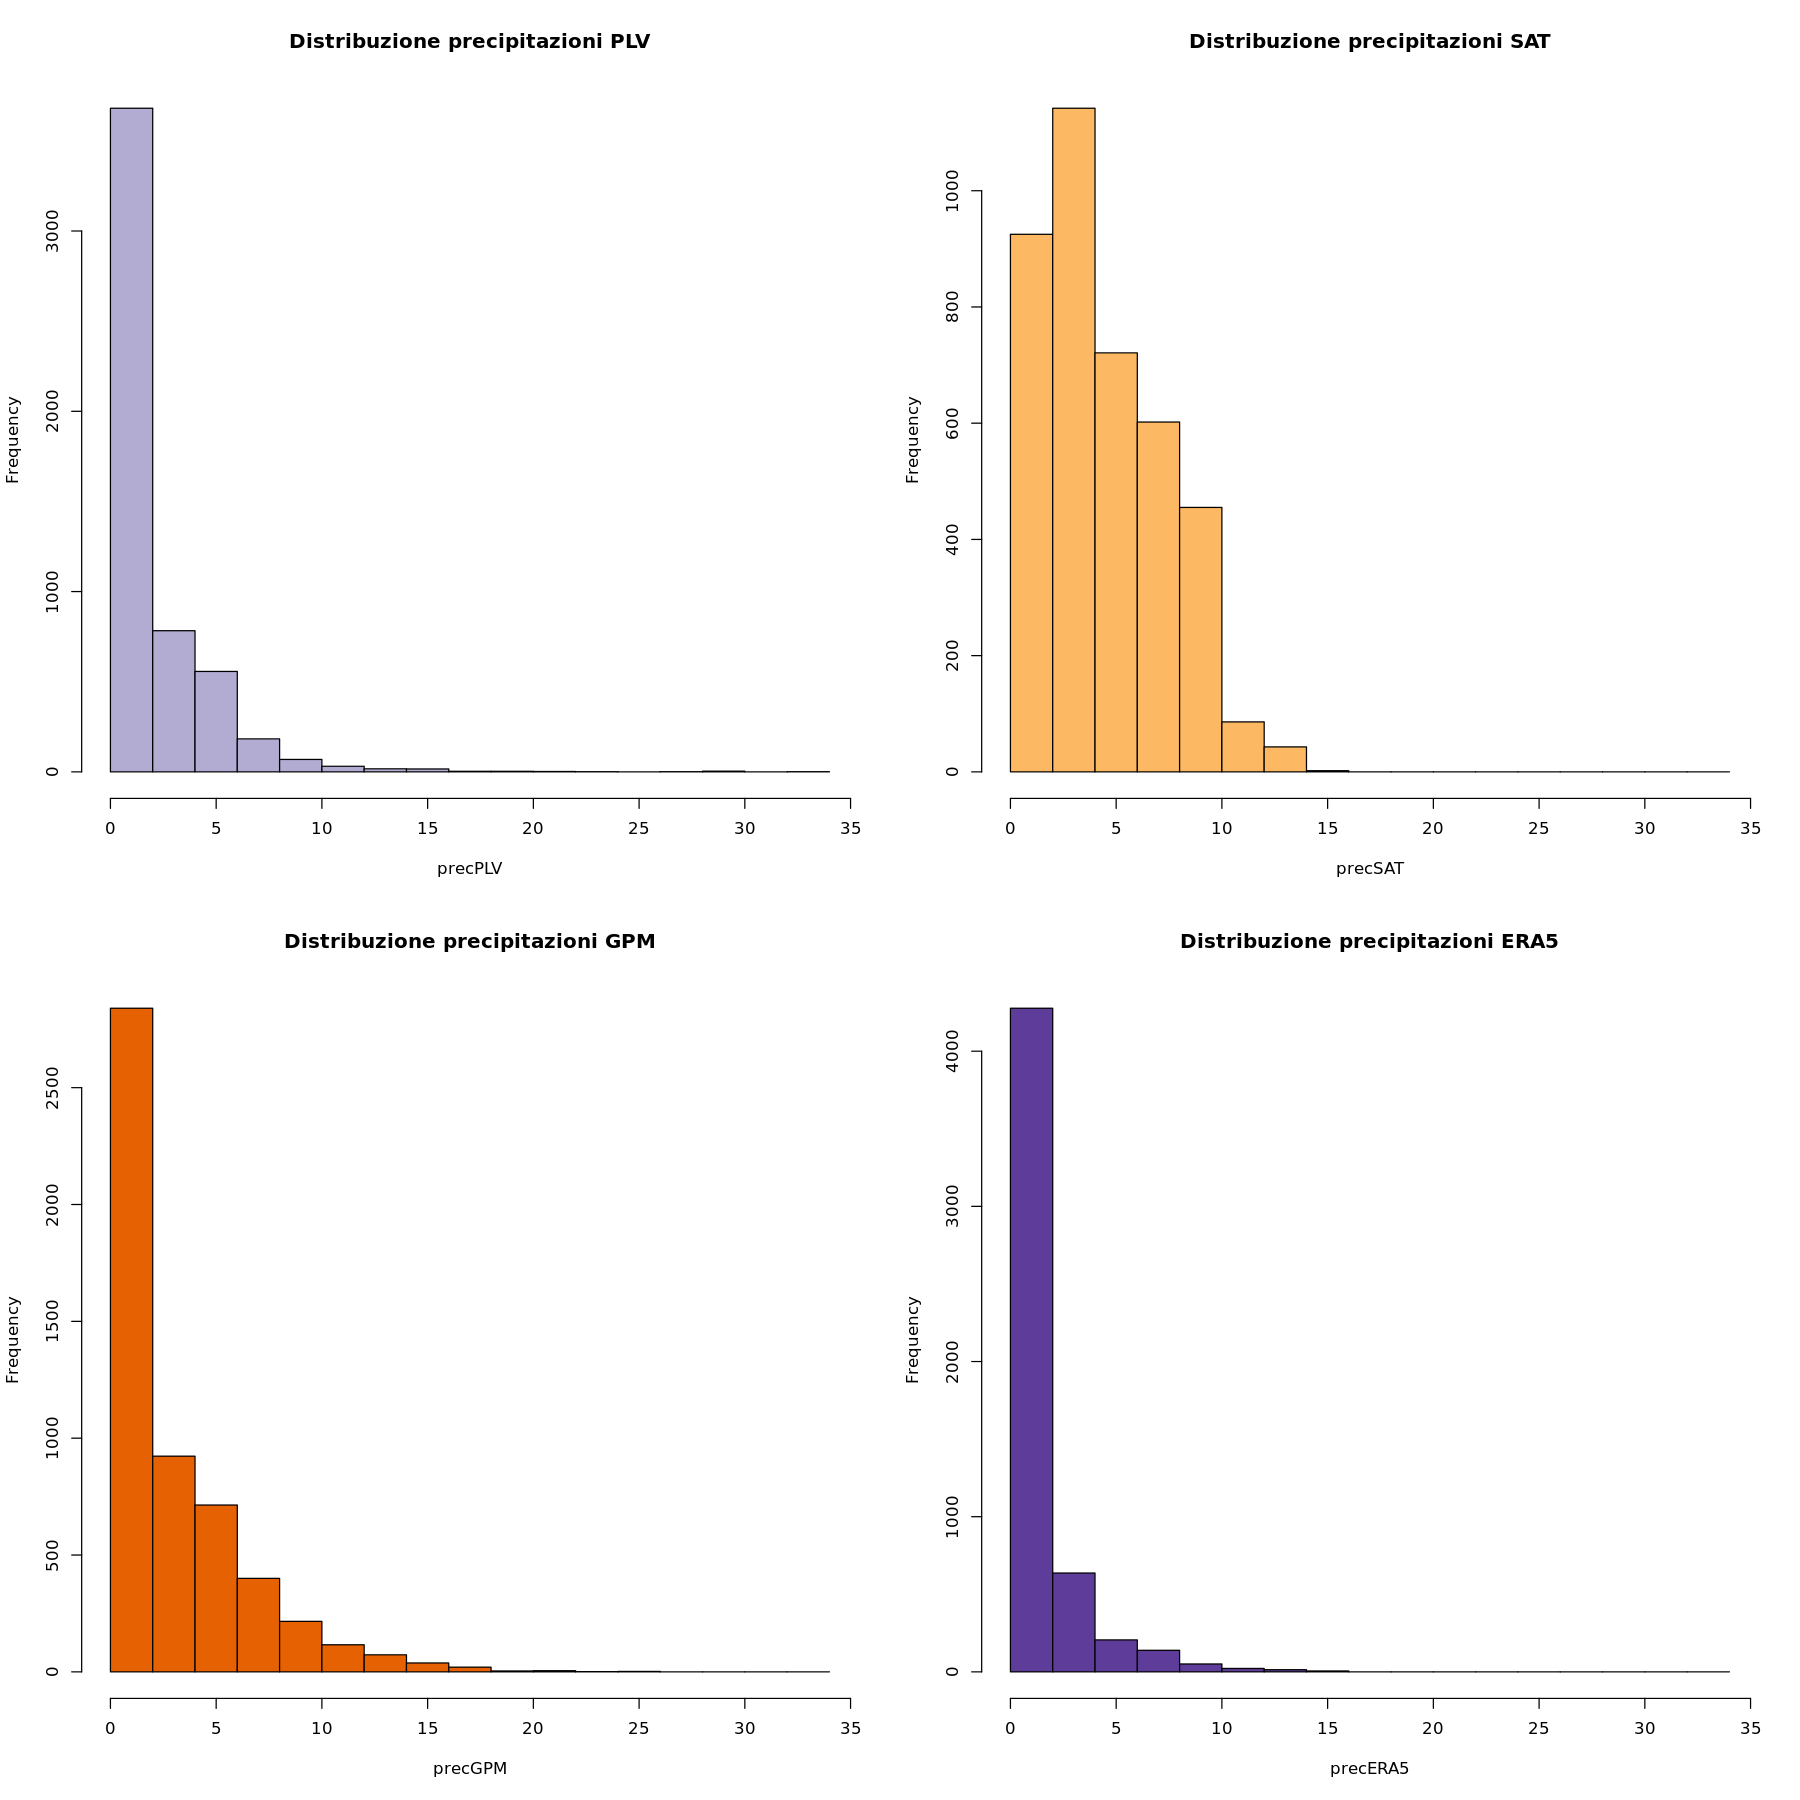

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow=c(2,2))

colors = c('#b2abd2',
'#fdb863',
'#e66101',
'#5e3c99')


hist_PLV = hist(precPLV, breaks = 20, col = colors[1], main = 'Distribuzione precipitazioni PLV')
#dens_PLV = hist_PLV$counts
dens_PLV = hist_PLV$density

breaks = hist_PLV$breaks
x = hist_PLV$mids

hist_SAT = hist(precSAT, breaks = breaks, col = colors[2], main = 'Distribuzione precipitazioni SAT')
#dens_SAT = hist_SAT$counts
dens_SAT = hist_SAT$density


hist_GPM = hist(precGPM, breaks = breaks, col = colors[3], main = 'Distribuzione precipitazioni GPM')
#dens_GPM = hist_GPM$counts
dens_GPM = hist_GPM$density


hist_ERA5 = hist(precERA5, breaks = breaks, col = colors[4], main = 'Distribuzione precipitazioni ERA5')
#dens_ERA5 = hist_ERA5$counts
dens_ERA5 = hist_ERA5$density




In [ ]:
pdf("PDF.pdf", width=7, height=7)
options(repr.plot.width = 7, repr.plot.height = 7)


plot(x, dens_PLV, col = colors[1], lwd = 2, type = 'l',
    main = 'PDF dei dati di precipitazione', xlab = 'Tasso di precipitazione (mm/h)',
    ylab = 'Densità (scala logaritmica)', yaxt='n',
    log = 'y')

grid()
lines(x, dens_SAT, col = colors[2], lwd = 2)
lines(x, dens_GPM, col = colors[3], lwd = 2)
lines(x, dens_ERA5, col = colors[4], lwd = 2)

axis(2, at = c(1e-03, 1e-02, 1e-01, 1))

legend('topright', legend = c('PLV', 'SAT', 'GPM', 'ERA5'), 
        col = colors,
        lwd = 2, bty = 'n', y.intersp = 1.2)

dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 y values <= 0 omitted from logarithmic plot”


png 
  2

In [ ]:
dens_PLV

[1] 3.438901e-01 7.315022e-02 5.203662e-02 1.709641e-02 6.446188e-03
 [6] 2.896114e-03 1.588191e-03 1.494768e-03 2.802691e-04 2.802691e-04
[11] 1.868460e-04 9.342302e-05 0.000000e+00 9.342302e-05 3.736921e-04
[16] 0.000000e+00 9.342302e-05

## Stessa dimensione

In [ ]:
precSAT = precSAT[!is.na(precPLV)]
precGPM = precGPM[!is.na(precPLV)]
precERA5 = precERA5[!is.na(precPLV)]
precPLV = precPLV[!is.na(precPLV)]

In [ ]:
length(precPLV)
length(precSAT)
length(precERA5)
length(precGPM)

[1] 5352

[1] 5352

[1] 5352

[1] 5352

## Indici continui

In [ ]:
MeanError <- function(data, prec) {
            a = 0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i]) }
            a = a/length(data)
            return(a)
}

MeanAbsError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { a = a + abs(data[i] - prec[i]) }
            a = a/length(data)
            return(a)
}

RootMeanSquareError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i])^2 }
            a = sqrt(a/length(data))
            return(a)
}

FracStanError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { 
                b = (data[i] - prec[i])^2
                if ( b != 0 ) { a = (a + b/((prec[i])^2))}}
            a = sqrt(a/length(data))
            return(a)
}

CoeffVar <- function(data, prec) {
            a=0
            b=0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i])^2
                                        b = b + (data[i])^2 }
            a = a/b
            return(a)
}


In [ ]:
#Calcolo tutti indici continui

IndexC <- function(data, dataref, a="s") {

        if (a == 'SAT') {
        data = data[!is.na(precSAT)]
        dataref2 = dataref[!is.na(precSAT)]
        #index = c(MeanError(data, dataref2), MeanAbsError(data, dataref2), RootMeanSquareError(data, dataref2),FracStanError(data, dataref2), CoeffVar(data, dataref2), cor(data, dataref2))
        index = c(MeanError(data, dataref2), MeanAbsError(data, dataref2), RootMeanSquareError(data, dataref2), CoeffVar(data, dataref2), cor(data, dataref2))
        }
        else {
        #index = c(MeanError(data, dataref), MeanAbsError(data, dataref), RootMeanSquareError(data, dataref),FracStanError(data, dataref), CoeffVar(data, dataref), cor(data, dataref))
        index = c(MeanError(data, dataref), MeanAbsError(data, dataref), RootMeanSquareError(data, dataref), CoeffVar(data, dataref), cor(data, dataref))
        }

        
        return(index)
}


In [ ]:
indexGPM_PLV = IndexC(precGPM, precPLV)
indexERA5_PLV = IndexC(precERA5, precPLV)
indexSAT_PLV = IndexC(precSAT, precPLV, 'SAT')

indexGPM_SAT = IndexC(precSAT, precGPM, 'SAT')
indexERA5_SAT = IndexC(precSAT, precERA5, 'SAT')

indexGPM_ERA5 = IndexC(precGPM, precERA5, 'SAT')


In [ ]:
index <- matrix(as.numeric(c(indexERA5_PLV, indexGPM_PLV, indexSAT_PLV, indexGPM_SAT, indexERA5_SAT, indexGPM_ERA5)), 5, 6)
colnames(index) <- c("ERA5 - PLV", "GPM - PLV", "SAT - PLV", "GPM - SAT", "ERA5 - SAT", "GPM - ERA5")
#rownames(index) <- c("ME", "MAE", "RMS", "FSE", "CV", "r")
rownames(index) <- c("ME", "MAE", "RMSE", "CV", "r")

print(index)

     ERA5 - PLV GPM - PLV SAT - PLV GPM - SAT ERA5 - SAT GPM - ERA5
ME   -0.6341880 1.2001397 2.3705742 0.5881232 3.00543465  2.4173115
MAE   1.8049312 2.2644049 3.3801114 2.9795576 3.64481859  3.2640969
RMSE  3.0332033 3.5996332 4.4251208 3.9327803 4.69162378  4.4408484
CV    1.7145692 0.6336169 0.6908994 0.5457125 0.77662419  0.7226698
r     0.2204069 0.3954754 0.1689354 0.2743824 0.03371505  0.2164722


In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('pheatmap')
library('pheatmap')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
index[,1:3]

,ERA5 - PLV,GPM - PLV,SAT - PLV
ME,-0.6341880,1.2001397,2.3705742
MAE,1.8049312,2.2644049,3.3801114
RMS,3.0332033,3.5996332,4.4251208
CV,1.7145692,0.6336169,0.6908994
r,0.2204069,0.3954754,0.1689354


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)
pdf('indici_continui1.pdf', width = 5, height = 4)
rf = colorRampPalette(rev(brewer.pal(5,'Spectral')))
r <- rf(100)
pheatmap(index[,1:3], display_numbers = T, color = r,
        cluster_rows = F, cluster_cols = F,
        main = 'Indici statistici rispetto a valore di riferimento (PLV)',
        angle_col = 0,
        fontsize_number = 20,
        fontsize_col = 17,
        fontsize_row = 17,
        labels_col = c('ERA5', 'GPM', 'SAT'),
        fontsize = 15,
        legend = F, filename = 'indici_continui1.pdf'
        )


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)
rf = colorRampPalette(rev(brewer.pal(5,'Spectral')))
r <- rf(100)
pheatmap(index[,4:6], display_numbers = T, color = r,
        cluster_rows = F, cluster_cols = F,
        main = 'Indici statistici tra i campi stimati',
        angle_col = 0,
        fontsize_number = 20,
        fontsize_col = 17,
        fontsize_row = 17,
        #labels_col = c('ERA5', 'GPM', 'SAT'),
        fontsize = 15,
        legend = F, filename = 'indici_continui2.pdf'
        )


### Scatterplot

In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')
install.packages('ggplot2')
library('ggplot2')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("RColorBrewer"):
“installation of package ‘RColorBrewer’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”


In [ ]:
pdf("PLV_GPM.pdf", width= 10, height= 10)
#par(mar=c(1, 0.1, 0.1, 0.1))
PLV_GPM <- ggplot(data.frame(precPLV, precGPM), aes(x = precPLV, y = precGPM))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                   # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione GPM e PLV"),
                x = "PLV (mm/h)",
                y = "GPM (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot")
PLV_GPM
dev.off()

pdf("PLV_SAT.pdf", width= 10, height= 10)
PLV_SAT <- ggplot(data.frame(precPLV, precSAT), aes(x = precPLV, y = precSAT))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                         # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione SAT e PLV"),
                x = "PLV (mm/h)",
                y = "SAT (mm/h)", 
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

PLV_SAT
dev.off()

pdf("PLV_ERA5.pdf", width= 10, height= 10)
PLV_ERA5 <- ggplot(data.frame(precPLV, precERA5), aes(x = precPLV, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                       # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e PLV"),
                x = "PLV (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

PLV_ERA5
dev.off()

pdf("GPM_ERA5.pdf", width= 10, height= 10)
GPM_ERA5 <- ggplot(data.frame(precGPM, precERA5), aes(x = precGPM, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                         # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e GPM"),
                x = "GPM (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

GPM_ERA5
dev.off()

pdf("SAT_ERA5.pdf", width= 10, height= 10)
SAT_ERA5 <- ggplot(data.frame(precSAT, precERA5), aes(x = precSAT, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                   # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e SAT"),
                x = "SAT (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

SAT_ERA5
dev.off()

pdf("SAT_GPM.pdf", width= 10, height= 10)
SAT_GPM <- ggplot(data.frame(precSAT, precGPM), aes(x = precSAT, y = precGPM))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                 # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione GPM e SAT"),
                x = "SAT (mm/h)",
                y = "GPM (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

SAT_GPM
dev.off()

Warning message:
“Removed 68 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 1376 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 45 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 62 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 49 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 1376 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 42 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 1376 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 21 rows containing missing values (geom_tile).”


png 
  2

## Indici discreti

In [ ]:
count <- function(data, threshold) {

        counts = cbind(0,0,0,0,0)
        #hit, miss, false alarm, correct rejection, total
        for(i in 1:length(data)) { 
            if(precPLV[i] > threshold) {
                if(data[i] > threshold && !is.na(data[i])) {counts[1] = counts[1]+1
            } else {counts[2] = counts[2]+1}
            } else {
                if(data[i] > threshold && !is.na(data[i])) {counts[3] = counts[3]+1
                } else {counts[4] = counts[4]+1}
            }
        }
        counts[5] = length(data)

        return(counts)
}

IndexD <- function(count) {

    PC = (count[1]+count[4])/count[5]
    POD = count[1]/(count[1]+count[2])
    FAR = count[3]/(count[3]+count[1])
    CSI = count[1]/(count[1]+count[2]+count[3])
    hitR = (count[1]+count[2])*(count[1]+count[3])/count[5]
    ETS = (count[1]-hitR)/(count[1]+count[2]+count[3]-hitR)

    return(c(PC, POD, FAR, CSI, ETS))
}

In [ ]:
indexD_GPM = c()
indexD_ERA5 = c()
indexD_SAT = c()

In [ ]:
threshold = c(0.1, 0.25, 0.5, 1, 2.5, 5, 10, 12, 15)

for (i in 1:9) {
#calcolo tabella di contingenza
precGPM_c = count(precGPM, threshold[i])
precERA5_c = count(precERA5, threshold[i])
precSAT_c = count(precSAT, threshold[i])

#stampa tabella di contingenza
counts <- matrix(as.numeric(c(precGPM_c, precERA5_c, precSAT_c)), 5, 3)
colnames(counts) <- c("GPM", "ERA5", "SAT")
rownames(counts) <- c("hit", "miss", "false alarm", "correct rejection", "total")
cat(paste0("Tabella di contingenza con soglia ", threshold[i], '\n'))
print(counts)
cat('\n')

#calcolo indici discreti
indexD_GPM = cbind(indexD_GPM, IndexD(precGPM_c))
indexD_ERA5 = cbind(indexD_ERA5, IndexD(precERA5_c))
indexD_SAT = cbind(indexD_SAT, IndexD(precSAT_c))

#stampa indici
indexD <- matrix(as.numeric(c(indexD_GPM[,i], indexD_ERA5[,i], indexD_SAT[,i])), 5, 3)
colnames(indexD) <- c("GPM", "ERA5", "SAT")
rownames(indexD) <- c("PC", "POD", "FAR", "CSI", "ETS")
cat(paste0("Indici discreti con soglia ", threshold[i], "\n"))
print(indexD)
cat(paste0("-----------------------------", "\n"))
}

colnames(indexD_GPM) = threshold
colnames(indexD_ERA5) = threshold
colnames(indexD_SAT) = threshold

Tabella di contingenza con soglia 0.1
                   GPM ERA5  SAT
hit               3158 2055 2832
miss               428 1531  754
false alarm       1242  721 1144
correct rejection  524 1045  622
total             5352 5352 5352

Indici discreti con soglia 0.1
          GPM       ERA5        SAT
PC  0.6879671 0.57922272 0.64536622
POD 0.8806470 0.57306191 0.78973787
FAR 0.2822727 0.25972622 0.28772636
CSI 0.6541011 0.47713025 0.59873150
ETS 0.1116400 0.07968829 0.08129927
-----------------------------
Tabella di contingenza con soglia 0.25
                   GPM ERA5  SAT
hit               2749 1659 2517
miss               427 1517  659
false alarm       1408  745 1390
correct rejection  768 1431  786
total             5352 5352 5352

Indici discreti con soglia 0.25
          GPM       ERA5        SAT
PC  0.6571375 0.57735426 0.61715247
POD 0.8655542 0.52235516 0.79250630
FAR 0.3387058 0.30990017 0.35577169
CSI 0.5996946 0.42310635 0.55124836
ETS 0.1332649 0.09317272 0.08831884


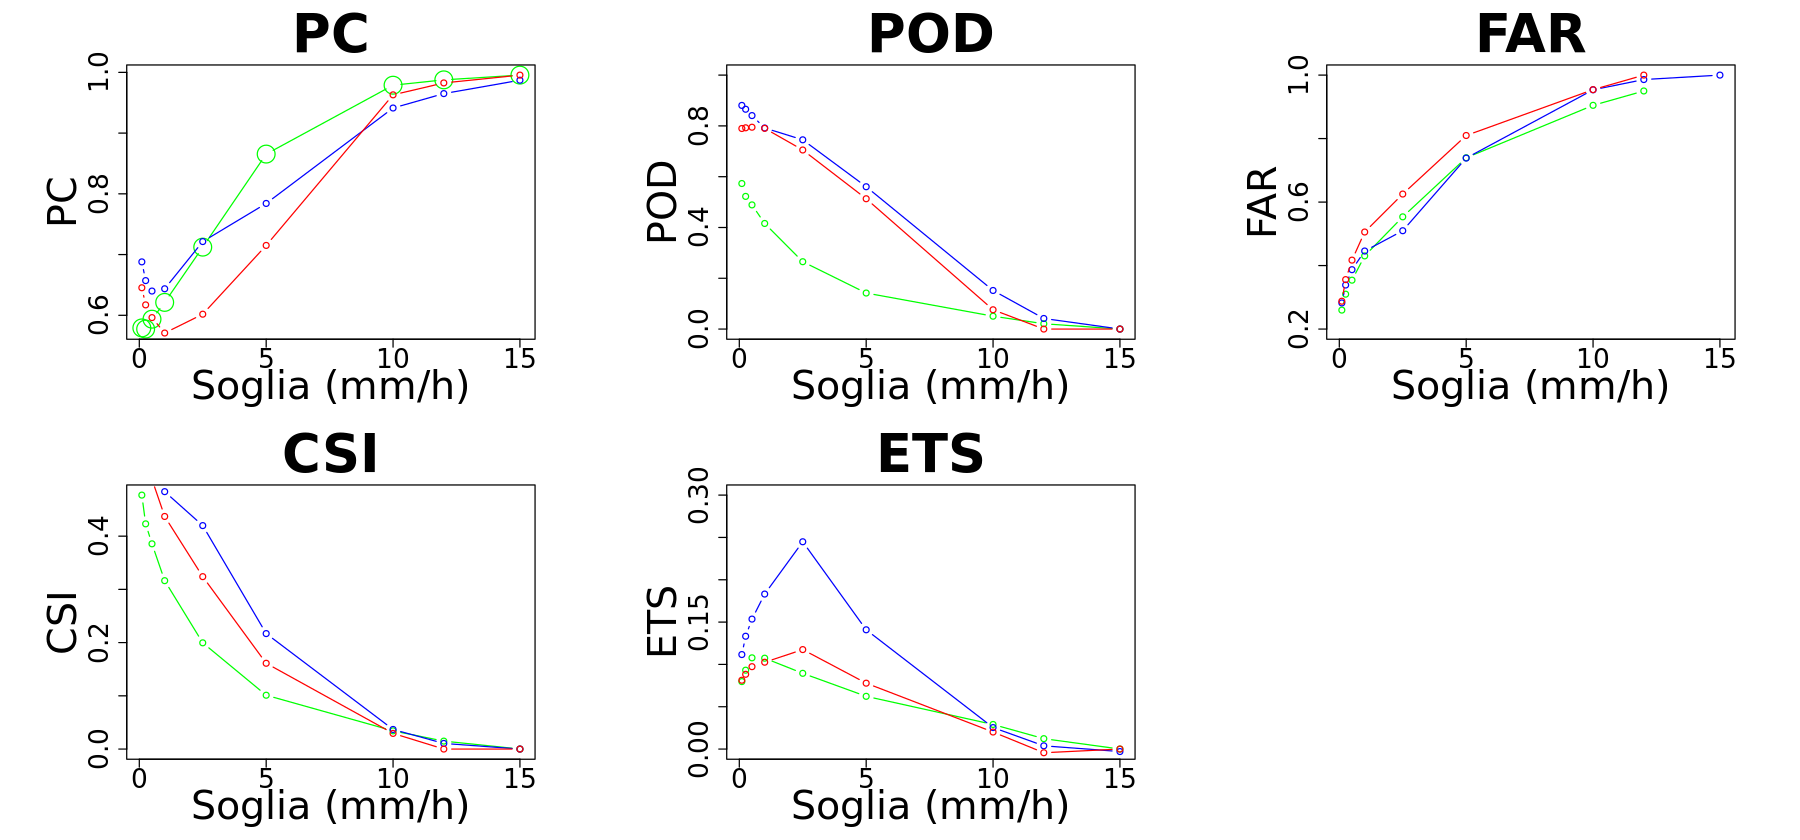

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(2,3), mar =c(5.1,8,4.1,4.1))
#par(mfrow = c(1,2), mar =c(5.1,8,4.1,4.1))


plot(threshold, indexD_ERA5[1,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'PC', main = "PC", cex.main = 4, col = "green",
     cex=3, cex.axis = 2, cex.lab = 3)
lines(threshold, indexD_GPM[1,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[1,], col = "red", type = 'b')
#legend(x='topleft', legend= c('ERA5', 'GPM', 'SAT'), bty = 'n', col = c('red', 'blue', 'green'), lwd = 1, cex = 0.5 )

plot(threshold, indexD_ERA5[2,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'POD', main = "POD", cex.main = 4, col = "green",
    cex.axis = 2, cex.lab = 3, ylim = c(0,1))
lines(threshold, indexD_GPM[2,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[2,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[3,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'FAR', main = "FAR", cex.main = 4, col = "green",
     cex.axis = 2, cex.lab = 3, ylim = c(0.2,1))
lines(threshold, indexD_GPM[3,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[3,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[4,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'CSI', main = "CSI", cex.main = 4, col = "green",
     cex.axis = 2, cex.lab = 3)
lines(threshold, indexD_GPM[4,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[4,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[5,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'ETS', main = "ETS", cex.main = 4, col = "green",
    cex.axis = 2, cex.lab = 3, ylim = c(0,0.3))
lines(threshold, indexD_GPM[5,], col = "blue", type = 'b')
lines(threshold, indexD_SAT[5,], col = "red", type = 'b')

#dev.off()

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 7)
#par(mfrow = c(2,3), mar =c(5.1,8,4.1,4.1))
pdf('indici_discreti1.pdf', width = 18, height = 7)
par(mfrow = c(1,2), mar =c(5.1,8,4.1,4.1))

plot(threshold, indexD_ERA5[2,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'POD', main = "Probability of Detection", cex.main = 3, col = colors[4],
    cex.axis = 2, cex.lab = 2, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[2,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[2,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[3,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'FAR', main = "False Alarm Rate", cex.main = 3, col = colors[4],
     cex.axis = 2, cex.lab = 2, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[3,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[3,], col = colors[2], type = 'b', lwd = 3)
#legend('bottomright', legend = c('SAT', 'GPM', 'ERA5'), col = colors[2:4], bty = 'n')

par(fig = c(0, 1, 0, 1), oma = c(4,1, 2, 2), mar = c(1, 1, 1, 2), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottomright', legend = c('SAT', 'GPM', 'ERA5'), 
        col = colors[2:4], bty = 'n', cex=2, lwd=3)

dev.off()


png 
  2

In [ ]:
options(repr.plot.width = 27, repr.plot.height = 7)

pdf('indici_discreti2.pdf', width = 27, height = 7)
par(mfrow = c(1,3), mar =c(10,8,4.1,4.1))

plot(threshold, indexD_ERA5[1,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'PC', main = "Percent Correct", cex.main = 4, col = colors[4],
     cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[1,], col = colors[3], type = 'b', lwd = 3 )
lines(threshold, indexD_SAT[1,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[4,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'CSI', main = "Critical Success Index", cex.main = 4, col = colors[4],
     cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[4,], col = colors[3], type = 'b', lwd = 3 )
lines(threshold, indexD_SAT[4,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[5,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'ETS', main = "Equitable Threat Score", cex.main = 4, col = colors[4],
    cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[5,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[5,], col = colors[2], type = 'b', lwd = 3)

par(fig = c(0, 1, 0, 1), oma = c(7,1, 4, 0), mar = c(1, 1, 1, 4), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('topright', legend = c('SAT', 'GPM', 'ERA5'), 
        col = colors[2:4], bty = 'n', cex=3, lwd=3)
dev.off()

png 
  2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=97041d7f-a092-4add-8b94-91c21b1dd7af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>